In [1]:
import healpy as hp
from healpy.newvisufunc import projview, newprojplot
import numpy as np
import h5py
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import tqdm
from matplotlib.colors import LogNorm
import os
import pickle

In [2]:
def IndexToDeclRa(index, NSIDE = 16):
    theta,phi=hp.pixelfunc.pix2ang(NSIDE,index)
    return -np.degrees(theta-np.pi/2.),np.degrees(np.pi*2.-phi)

def show_map(map_array):
    projview(
    map_array,
    coord=["G"],
    graticule=True,
    graticule_labels=True,
    unit="SNR",
    xlabel="longitude",
    ylabel="latitude",
    cb_orientation="horizontal",
    projection_type="mollweide",rot=(-180,0,0),cmap='viridis'
    )

In [3]:
output_map_location = os.path.abspath("/Users/anirbanain/PROJECTS/GRAVITATIONAL_WAVES/PYSTOCH/OUTPUT")
files = os.listdir(output_map_location)
entries = os.scandir(output_map_location)
entries = sorted(entries, key=lambda entry: entry.stat().st_mtime, reverse=True)
print(entries[0].name)

Pixel_simulatedH1L1_16_28082024.pkl


In [4]:
pickle_file = os.path.join(output_map_location, entries[0].name)
with open(pickle_file, 'rb') as file:
    loaded_data = pickle.load(file)
#print(loaded_data.keys())

In [5]:
ASAF_maps = loaded_data.get("map_dirty_pix")
f_all = loaded_data.get("f_all")
map_BBR = np.sum(ASAF_maps,axis=0)
np.shape(map_BBR)

(3072,)

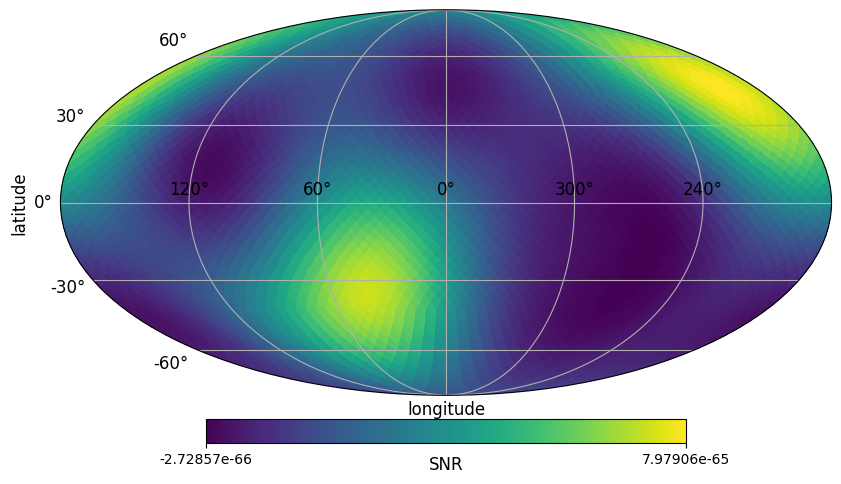

In [9]:
show_map(np.real(ASAF_maps[0]))

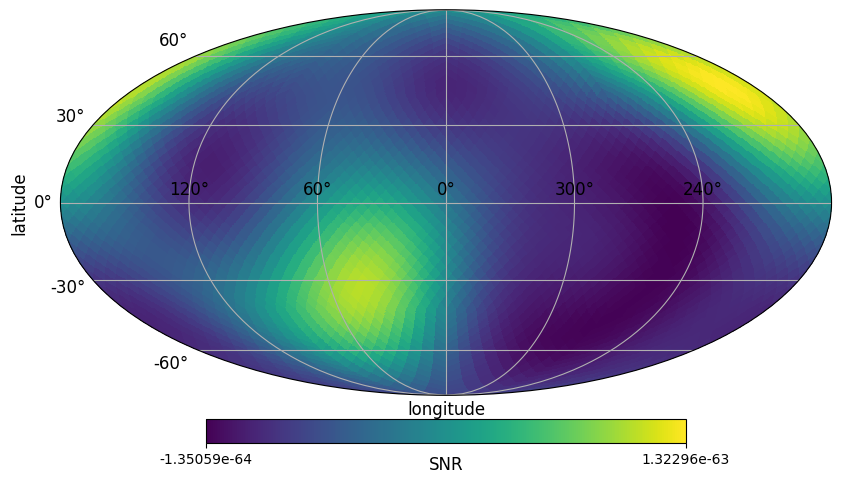

In [7]:
show_map(np.real(map_BBR))